#### Analyse de série temporelle avec Python

In [3]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

Dans cet tutoriel, nous nous intéressons au cours de l'action ford sur le marché US. Pour ce faire, nous utiliserons la fonction **DataReader** de pandas.

In [2]:
#### Création d'un data frame avec les valeur de l'action Ford de 2012 à 2019
ford = web.DataReader('F', data_source= "yahoo", start = "3/14/2012", end = "4/04/2019" )

On obtient un dataframe de 6 colonnes pour chaque date de cotation (Index).
* **Open** le prix d'ouverture
* **High** le prix le plus haut
* **Low** le prix le plus bas 
* **Close** le prix de clôture de l'action
* **Adj Close** le prix ajusté de clôture (cf ouverture de capital)
* **Volume** qui correspond au nombre d'actions échangé le jour

In [3]:
ford.head(5)
ford.tail(5) ### 5 dernière valeurs du cours

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-29,8.89,8.71,8.80,8.78,33962800.0,8.236733
2019-04-01,9.00,8.86,8.86,8.98,45653100.0,8.424358
2019-04-02,9.03,8.91,8.95,9.01,30699400.0,8.452501
2019-04-03,9.27,9.06,9.07,9.13,56663600.0,8.565078
2019-04-04,9.30,9.18,9.21,9.24,39483100.0,8.668272


In [4]:
ford.shape #### 1777 valeurs pour l'interval choisie

(1776, 6)

In [5]:
##### Moyenne sur les 100 dernières valeurs pour avoir un ordre d'idée du prix de l'action

import numpy as np 

len(ford.iloc[1677:1777,:]) #### 100 dernières valeurs

np.mean(ford.iloc[1677:1777, :])

High         8.813535e+00
Low          8.571717e+00
Open         8.694545e+00
Close        8.684040e+00
Volume       4.441713e+07
Adj Close    8.071931e+00
dtype: float64

En moyenne sur les 100 dernières valeurs, l'action ford vaut **8.70** dollars.

On crée une nouvelle variable qui correspond aux rangs de l'action dans notre data frame de la plus ancienne à la plus récente. On l'appelera "**Num**".

In [6]:
ford["Num"] = range(1, len(ford) +1) ##### Incrémente la valeur suivant son rang dans le dataset

In [7]:
ford.tail()

,High,Low,Open,Close,Volume,Adj Close,Num
Date,,,,,,,
2019-03-29,8.89,8.71,8.80,8.78,33962800.0,8.236733,1772
2019-04-01,9.00,8.86,8.86,8.98,45653100.0,8.424358,1773
2019-04-02,9.03,8.91,8.95,9.01,30699400.0,8.452501,1774
2019-04-03,9.27,9.06,9.07,9.13,56663600.0,8.565078,1775
2019-04-04,9.30,9.18,9.21,9.24,39483100.0,8.668272,1776


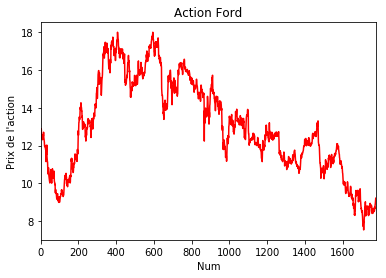

In [8]:
#### On trace le prix de l'action en fonction du temps

def graph(x,y,data):
    
    """
        Graphique une variable en fonction de l'autre
            Entrée: Nom colonne 1 (x), nom colonne 2 (y) et données (data)
            
            Sortie: Graphique
    """

    graph = data.plot("Num", "Open", legend = False, title = "Action Ford", color = (1,0,0));
    graph.legend = None
    graph.set_ylabel('Prix de l\'action')
    

graph("Num", "Open", ford)

Dans cette partie, on ne sélectionnera qu'un dixième et un vingtième des données:

**10 %** des données:

In [9]:
#### On ne sélectionne que 10% des données
un_dixieme = ford.sample(frac = .1, random_state = np.random.randint(10))

In [10]:
#### De la même façon avec 5% des données

un_vingtieme = ford.sample(frac = .05, random_state = np.random.randint(10))

In [11]:
un_dixieme.head()

,High,Low,Open,Close,Volume,Adj Close,Num
Date,,,,,,,
2012-06-06,10.58,10.27,10.29,10.57,50458000.0,7.491076,59
2013-04-29,13.76,13.57,13.73,13.66,20659200.0,9.852895,282
2017-02-07,12.52,12.31,12.50,12.34,32914400.0,10.331132,1234
2013-12-31,15.43,15.26,15.29,15.43,27829000.0,11.341795,453
2018-12-10,8.85,8.38,8.83,8.52,56499700.0,7.855958,1697


PB: Valeur ne sont pas dans l'ordre

In [12]:
un_dixieme.head()

,High,Low,Open,Close,Volume,Adj Close,Num
Date,,,,,,,
2012-06-06,10.58,10.27,10.29,10.57,50458000.0,7.491076,59
2013-04-29,13.76,13.57,13.73,13.66,20659200.0,9.852895,282
2017-02-07,12.52,12.31,12.50,12.34,32914400.0,10.331132,1234
2013-12-31,15.43,15.26,15.29,15.43,27829000.0,11.341795,453
2018-12-10,8.85,8.38,8.83,8.52,56499700.0,7.855958,1697


In [13]:
#### On enleve l'index de ce data frame

un_dixieme.index.name = None
un_dixieme.head()####Plus le nom de l'index Date

un_vingtieme.index.name = None

In [14]:
#### On tri les valeurs par Num

un_dixieme = un_dixieme.sort_values(by = ["Num"], ascending = [True])
un_dixieme[["Open", "Close", "Num"]]#### Double crôchet
un_vingtieme = un_vingtieme.sort_values(by = ["Num"], ascending = [True])

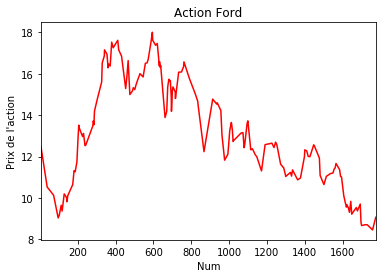

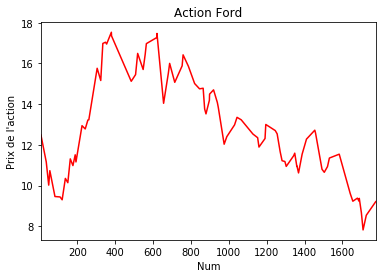

In [15]:
#### On trace le graphique original par rapport à l'echantillon de données

#### Un dixième
graph("Num", "Open", un_dixieme)

#### Un vingtième
graph("Num", "Open", un_vingtieme)


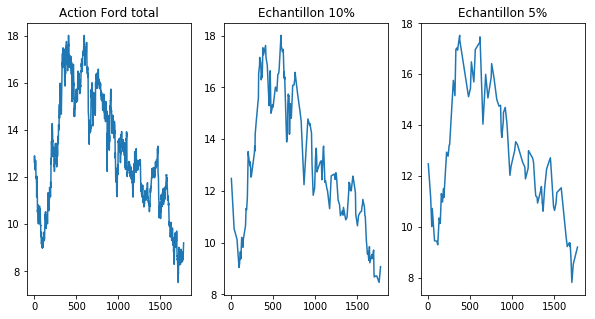

In [16]:
#### On affiche les deux graphiques en même temps

#### Sous graphique d'une ligne et 2 colonnes


def trois_graph(x, y):
    
    """
        Fonction qui retourne trois graphiques (Action ford, 10% des valeurs aléatoires et 5% des valeurs)
        
        Entrée: Nom de colonne x et y
        
        Sortie: Trois graphiques
    
    """
    #### Une ligne et trois tableaux 
    fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (10,5))
    #### Affichage premier tableau 
    axes[0].plot(x, y, data = ford)
    axes[0].set_title("Action Ford total")
    
    #### Affichage second tableau 10%
    axes[1].plot(x, y, data = un_dixieme)
    axes[1].set_title("Echantillon 10%")
    
    #### Affichage troisième tableau 5%
    axes[2].plot(x, y, data = un_vingtieme)
    axes[2].set_title("Echantillon 5%")


trois_graph("Num", "Open" ) #### Appel de la fonction

In [17]:
#### Modification de l'index pour que ce soit la variable "Num"

ford = ford.reset_index()
ford.head(3)

# ford.index = ford["Num"]
# ford

,Date,High,Low,Open,Close,Volume,Adj Close,Num
0,2012-03-14,12.90,12.63,12.64,12.88,47578500.0,9.088853,1
1,2012-03-15,13.04,12.83,12.90,12.90,55286600.0,9.102968,2
2,2012-03-16,12.90,12.51,12.86,12.51,77119600.0,8.827763,3


On génère une moyenne mobile avec une fenètre de 80 cotations. On place les résultats dans la colonne "**Moyenne mobile**".

In [18]:
#### Moyenne mobile 

#### Moyenne mobile à fenètre de 80
ford["Moyenne_Mobile"] = ford["Open"].rolling(window =80).mean()

ford[["Open", "Moyenne_Mobile"]].tail(5) #### 5 dernières colonnes de notre dataset

#ford

,Open,Moyenne_Mobile
1771,8.80,8.564000
1772,8.86,8.553375
1773,8.95,8.545875
1774,9.07,8.545250
1775,9.21,8.547625


Text(0.5,1,'Moyenne Mobile à 80 cotations')

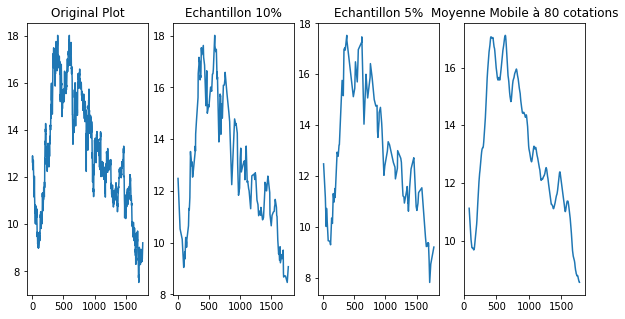

In [19]:
#### On affiche les 4 graphiques en même temps

#### Sous graphique d'une ligne et 2 colonnes
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (10,5))

axes[0].plot("Num", "Open", data = ford)
axes[0].set_title("Original Plot")
axes[1].plot("Num", "Open", data = un_dixieme)
axes[1].set_title("Echantillon 10%")
axes[2].plot("Num", "Open", data = un_vingtieme)
axes[2].set_title("Echantillon 5%")
axes[3].plot("Num", "Moyenne_Mobile", data = ford)
axes[3].set_title("Moyenne Mobile à 80 cotations")

La moyenne mobile semble bien fitter les graphiques précedents. Qu'en est t-il si nous les superposons?

In [20]:
##### On affiche les données originale et les données lissée sur le même graphique


def sup_graph(x, y1, y2):
    """
        Entrée: Nombre de cotation(x), prix moyenne mobile (y1), prix high (y2)
        
        Sortie: Graphique
    
    """
    fig = plt.figure()
    ax = fig.add_subplot(111);
    #### Graphique 1: Moyenne mobile
    ax.plot(ford[x], ford[y1], color = (0,0,0), linewidth = 4, alpha =.9, label = "Lissé MM")
    
    #### Graphique 2: Plus haut de cotation
    ax.plot(ford[x], ford[y2], color = (1,0,0), label = "Original")

    ax.set_title('Les données originales et lissées')

    ax.set_xlabel('Num')
    ax.set_ylabel("Prix")
    ax.legend(loc = "lower right")

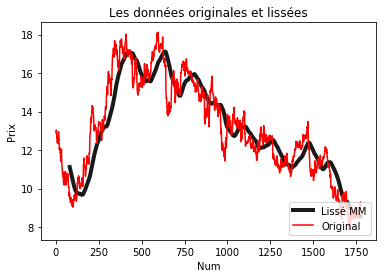

In [21]:
sup_graph("Num", "Moyenne_Mobile", "High")

Le même code mais avec les dates en abscisses:

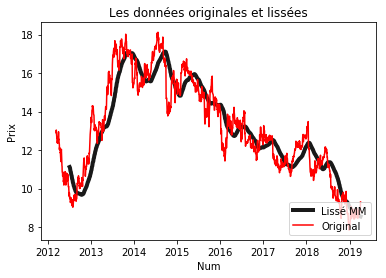

In [22]:
sup_graph("Date", "Moyenne_Mobile", "High")

On prendra ici les cotations entre 200 et 400.

In [58]:
#### Cotation entre 500 et 1000
Num_ford = ford[(ford["Num"] >= 500) & (ford["Num"]<=1000)]

In [24]:
#Num_ford = ford[(ford["Num"] >= 200) & (ford["Num"]<=400)]

In [25]:
Num_ford

,Date,High,Low,Open,Close,Volume,Adj Close,Num,Moyenne_Mobile
499,2014-03-11,15.520000,15.170000,15.490000,15.300000,34612800.0,11.336385,500,15.925000
500,2014-03-12,15.420000,15.150000,15.240000,15.400000,31250500.0,11.410478,501,15.907250
501,2014-03-13,15.460000,15.100000,15.460000,15.180000,34344100.0,11.247472,502,15.886500
502,2014-03-14,15.250000,15.060000,15.180000,15.080000,26943300.0,11.173376,503,15.862125
503,2014-03-17,15.330000,15.160000,15.180000,15.280000,26929100.0,11.321563,504,15.838500
504,2014-03-18,15.570000,15.280000,15.290000,15.490000,28324200.0,11.477160,505,15.817250
505,2014-03-19,15.550000,15.350000,15.510000,15.480000,24374300.0,11.469752,506,15.800000
506,2014-03-20,15.550000,15.370000,15.450000,15.550000,21203100.0,11.521619,507,15.780500
507,2014-03-21,15.740000,15.450000,15.730000,15.470000,31678500.0,11.462343,508,15.763125
508,2014-03-24,15.540000,15.300000,15.480000,15.390000,27033600.0,11.403069,509,15.742875


Dans cette partie, on cherchera à prédire notre moyenne mobile à l'aide d'une régression linéaire

In [26]:
#### Regression Linéaire

from sklearn.linear_model import LinearRegression

#### fit(X,y)

#### On cherche a predire une moyenne mobile

model = LinearRegression().fit(Num_ford[["Close"]], Num_ford[["Moyenne_Mobile"]])


m = model.coef_[0
               ]
b = model.intercept_

#### Equation de la ligne

print("y=", round(m[0], 2), "x +", round(b[0],2)) ##### Equation de la droite

y= 0.44 x + 8.81


<math>
Y = X \beta + \epsilon
</math>

In [27]:
#### Prédiction de la moyenne mobile du cours d'ouverture

prediction = model.predict(Num_ford[["Moyenne_Mobile"]])
prediction[:10]

array([[15.74328834],
       [15.73556038],
       [15.72652628],
       [15.71591395],
       [15.70562814],
       [15.69637636],
       [15.68886609],
       [15.68037622],
       [15.67281151],
       [15.6639951 ]])

In [28]:
##### On crée un nouveau data frame avec les valeurs prédites
prediction = pd.DataFrame(data = prediction, index = Num_ford.index.values, columns = ["Pred"])

prediction.head(5)  #### Affichage des 5 valeurs

,Pred
499,15.743288
500,15.735560
501,15.726526
502,15.715914
503,15.705628


In [29]:
#### Jointure de la prediction avec l'ancienne table
jointure = Num_ford.join(prediction, how = "inner") 
jointure.head(5)

,Date,High,Low,Open,Close,Volume,Adj Close,Num,Moyenne_Mobile,Pred
499,2014-03-11,15.52,15.17,15.49,15.30,34612800.0,11.336385,500,15.925000,15.743288
500,2014-03-12,15.42,15.15,15.24,15.40,31250500.0,11.410478,501,15.907250,15.735560
501,2014-03-13,15.46,15.10,15.46,15.18,34344100.0,11.247472,502,15.886500,15.726526
502,2014-03-14,15.25,15.06,15.18,15.08,26943300.0,11.173376,503,15.862125,15.715914
503,2014-03-17,15.33,15.16,15.18,15.28,26929100.0,11.321563,504,15.838500,15.705628


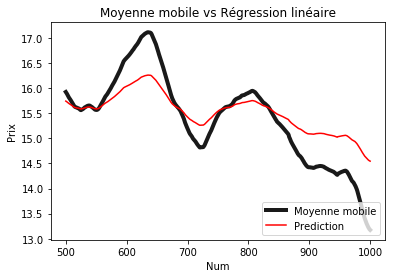

In [30]:
#### Affichage de la moyenne mobile et de la prédiction

fig = plt.figure()
ax =fig.add_subplot(111)
#### La variable d'ouverture
ax.plot(jointure["Num"], jointure["Moyenne_Mobile"], color = (0,0,0), linewidth = 4, alpha = .9,label = "Moyenne mobile")
#### La prédiction
ax.plot(jointure["Num"], jointure["Pred"], color = (1,0,0), label = "Prediction")
ax.set_title("Moyenne mobile vs Régression linéaire")
ax.set_xlabel("Num")
ax.set_ylabel("Prix")
ax.legend(loc="lower right")

In [31]:
import sklearn

r_carre = sklearn.metrics.r2_score(jointure["Moyenne_Mobile"],jointure["Pred"], multioutput = "uniform_average")
r_carre

0.666224520203802

In [32]:
### Check the performance of the Prediction
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, Num_ford[["Close"]],  model.predict(Num_ford[["Moyenne_Mobile"]]), cv=5)
print("scores = " + str(scores))

scores = [ 0.13829673 -2.95650598 -0.9398207   0.42220266 -6.99723207]


In [65]:
from sklearn.model_selection import train_test_split
X = Num_ford[['Close','Open']]
y = Num_ford[['Moyenne_Mobile']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [66]:
from sklearn.linear_model import LinearRegression
# Create model
linreg = LinearRegression()
linreg.fit(X_train, y_train)
# Calculate our y hat (how our model performs against the test data held off)
y_hat_test = linreg.predict(X_test)

In [67]:
metrics=y_test-linreg.predict(X_test)
metrics

,Moyenne_Mobile
658,1.292236
858,0.083057
980,0.063065
692,-0.016966
708,-0.177454
950,-0.476462
509,0.207937
885,-0.310301
564,-0.375978
694,0.375286


In [68]:
prediction = pd.DataFrame(data = y_hat_test, index = X_test.index.values, columns = ["Pred"])

prediction.head(5) 
jointure = Num_ford.join(prediction, how = "inner") 
jointure.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,Num,Moyenne_Mobile,Pred
984,2016-02-11,11.43,11.10,11.17,11.17,45801300.0,8.929186,985,13.673375,13.628906
991,2016-02-23,12.65,12.42,12.53,12.42,30136700.0,9.928422,992,13.375500,14.246411
995,2016-02-29,12.65,12.39,12.42,12.51,32999100.0,10.000366,996,13.249375,14.163294
996,2016-03-01,13.12,12.72,13.01,13.09,71523900.0,10.464012,997,13.227250,14.424634
999,2016-03-04,13.86,13.43,13.56,13.59,31818600.0,10.863708,1000,13.175125,14.675318


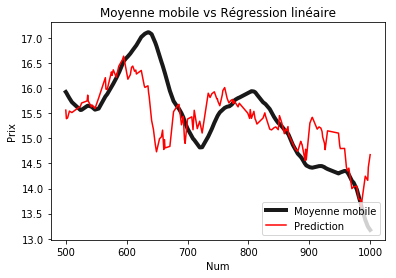

In [69]:
fig = plt.figure()
ax =fig.add_subplot(111)
#### La variable d'ouverture
ax.plot(jointure["Num"], jointure["Moyenne_Mobile"], color = (0,0,0), linewidth = 4, alpha = .9,label = "Moyenne mobile")
#### La prédiction
ax.plot(jointure["Num"], jointure["Pred"], color = (1,0,0), label = "Prediction")
ax.set_title("Moyenne mobile vs Régression linéaire")
ax.set_xlabel("Num")
ax.set_ylabel("Prix")
ax.legend(loc="lower right")

In [70]:
import sklearn

r_carre = sklearn.metrics.r2_score(y_test,y_hat_test, multioutput = "uniform_average")
r_carre

0.500063304890503

In [71]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# See our Squared Mean Error score and Root Mean Squared Error:
test_mse = mean_squared_error(y_test, y_hat_test)
test_rmse = np.sqrt(test_mse)
print("Squared Mean Error:",test_rmse)
# See our Mean Absolute Error
test_mae = mean_absolute_error(y_test, y_hat_test)
print("Mean Absolute Error:",test_mae)


Squared Mean Error: 0.6278997416622649
Mean Absolute Error: 0.43810472437290354


In [72]:
cv_5_results = cross_val_score(linreg, X, y, cv=5)
print("5 fold cross validation score:",cv_5_results)

5 fold cross validation score: [ 0.20772396 -2.85173717 -0.85084805  0.44338012 -6.65620061]
